# Explorative Datenanalyse

Dieses Notebook führt eine explorative Datenanalyse der Rohdaten durch.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Einstellungen für bessere Visualisierungen
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)

In [8]:
# Daten laden
edges = pd.read_csv('../data/edges.csv')
nodes = pd.read_csv('../data/nodes.csv')

print("=" * 60)
print("DATEN ÜBERSICHT")
print("=" * 60)
print(f"\nNodes-Datensatz: {len(nodes)} Zeilen, {len(nodes.columns)} Spalten")
print(f"Edges-Datensatz: {len(edges)} Zeilen, {len(edges.columns)} Spalten")
print(f"\nSpalten in nodes: {list(nodes.columns)}")
print(f"Spalten in edges: {list(edges.columns)}")


DATEN ÜBERSICHT

Nodes-Datensatz: 92 Zeilen, 5 Spalten
Edges-Datensatz: 12 Zeilen, 4 Spalten

Spalten in nodes: ['Id', 'Label', 'Name', 'Gruppe', 'Semester']
Spalten in edges: ['Source', 'Target', 'Type', 'Label']


## 1. Datenqualität und Vollständigkeit


In [9]:
# Fehlende Werte analysieren
print("=" * 60)
print("FEHLENDE WERTE - NODES")
print("=" * 60)
missing_nodes = nodes.isnull().sum()
missing_pct = (missing_nodes / len(nodes) * 100).round(2)
missing_df = pd.DataFrame({
    'Fehlend': missing_nodes,
    'Prozent': missing_pct
})
print(missing_df[missing_df['Fehlend'] > 0])

print("\n" + "=" * 60)
print("FEHLENDE WERTE - EDGES")
print("=" * 60)
missing_edges = edges.isnull().sum()
missing_pct_edges = (missing_edges / len(edges) * 100).round(2)
missing_df_edges = pd.DataFrame({
    'Fehlend': missing_edges,
    'Prozent': missing_pct_edges
})
print(missing_df_edges[missing_df_edges['Fehlend'] > 0])


FEHLENDE WERTE - NODES
          Fehlend  Prozent
Id              1     1.09
Label           1     1.09
Name            2     2.17
Gruppe          2     2.17
Semester       16    17.39

FEHLENDE WERTE - EDGES
Empty DataFrame
Columns: [Fehlend, Prozent]
Index: []


In [ ]:
# Visualisierung fehlender Werte
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Nodes
ax = axes[0]
missing_nodes_plot = nodes.isnull().sum()
missing_nodes_plot = missing_nodes_plot[missing_nodes_plot > 0]
if len(missing_nodes_plot) > 0:
    missing_nodes_plot.plot(kind='barh', ax=ax, color='coral')
    ax.set_xlabel('Anzahl fehlender Werte')
    ax.set_title('Fehlende Werte in Nodes-Datensatz')
    ax.grid(True, alpha=0.3, axis='x')
else:
    ax.text(0.5, 0.5, 'Keine fehlenden Werte', 
            ha='center', va='center', transform=ax.transAxes, fontsize=12)
    ax.set_title('Fehlende Werte in Nodes-Datensatz')

# Edges
ax = axes[1]
missing_edges_plot = edges.isnull().sum()
missing_edges_plot = missing_edges_plot[missing_edges_plot > 0]
if len(missing_edges_plot) > 0:
    missing_edges_plot.plot(kind='barh', ax=ax, color='steelblue')
    ax.set_xlabel('Anzahl fehlender Werte')
    ax.set_title('Fehlende Werte in Edges-Datensatz')
    ax.grid(True, alpha=0.3, axis='x')
else:
    ax.text(0.5, 0.5, 'Keine fehlenden Werte', 
            ha='center', va='center', transform=ax.transAxes, fontsize=12)
    ax.set_title('Fehlende Werte in Edges-Datensatz')

plt.tight_layout()
plt.show()


### Interpretation der fehlenden Werte

**Nodes-Datensatz:**
- **Id, Label (je 1 fehlend, 1.09%)**: Minimal, unkritisch
- **Name, Gruppe (je 2 fehlend, 2.17%)**: Geringfügig, sollte ergänzt werden
- **Semester (16 fehlend, 17.39%)**: Könnte absichtlich sein - Module ohne Semesterbeschränkung können in jedem Semester belegt werden (z.B. Projektmodule, Wahlmodule)

**Edges-Datensatz:**
- **Keine fehlenden Werte**: Vollständig, sehr gut für Analysen

**Fazit:** Datenqualität ist gut. Die fehlenden Semesterangaben könnten beabsichtigt für flexibel belegbare Module.


In [11]:
# Duplikate prüfen
print("=" * 60)
print("DUPLIKATE PRÜFUNG")
print("=" * 60)
print(f"Duplikate in nodes (nach Id): {nodes.duplicated(subset=['Id']).sum()}")
print(f"Duplikate in nodes (alle Spalten): {nodes.duplicated().sum()}")
print(f"Duplikate in edges (alle Spalten): {edges.duplicated().sum()}")
print(f"Duplikate in edges (Source-Target Paare): {edges.duplicated(subset=['Source', 'Target']).sum()}")

# Erste Zeilen anzeigen
print("\n" + "=" * 60)
print("ERSTE ZEILEN - NODES")
print("=" * 60)
print(nodes.head(10))

print("\n" + "=" * 60)
print("ERSTE ZEILEN - EDGES")
print("=" * 60)
print(edges.head())


DUPLIKATE PRÜFUNG
Duplikate in nodes (nach Id): 0
Duplikate in nodes (alle Spalten): 0
Duplikate in edges (alle Spalten): 0
Duplikate in edges (Source-Target Paare): 0

ERSTE ZEILEN - NODES
      Id  Label                       Name  \
0  lalg1  lalg1          Lineare Algebra 1   
1    vmo    vmo        Verbrennungsmotoren   
2   mimo   mimo             Mikromobilität   
3   ten1   ten1                        NaN   
4    stk    stk                     Statik   
5    ch1    ch1                   Chemie 1   
6    dsf    dsf   Drones and Smart Farming   
7    apd    apd    Advanced Product Design   
8  werk1  werk1               Werkstoffe 1   
9   flm4   flm4  Fluidmechanik mit Labor 4   

                                             Gruppe  Semester  
0                          Grundlagen: Mathematik 1      11.0  
1             Erneuerbare Energien: Wind und Wasser       6.0  
2             Erneuerbare Energien: Wind und Wasser       6.0  
3                                              

### Interpretation der Duplikate und Datenstruktur

**Duplikate:**
- **Keine Duplikate gefunden**: Alle IDs sind eindeutig, keine doppelten Einträge in nodes oder edges. Datenstruktur ist sauber.

**Datenstruktur:**
- **Nodes**: Jede Zeile repräsentiert ein Modul mit Id, Label, Name, Gruppe und Semester
- **Edges**: Jede Zeile repräsentiert eine Voraussetzungsbeziehung (Source → Target)
- **Beobachtung**: Einige Module haben fehlende Namen (z.B. "ten1") oder fehlende Gruppenangaben


## 2. Verteilung nach Gruppen


VERTEILUNG NACH GRUPPEN
Gruppe
Fachvertiefung: Maschinenbau                        20
Erneuerbare Energien: Wind und Wasser               19
Projekte: Maschinenbau                              10
Grundlagen:\nNaturwissenschaften                     6
Grundlagen: Labor                                    6
Grundlagen: Technische Mechanik                      5
Grundlagen: Werkstoffe,\nFertigung, Konstruktion     5
Grundlagen: Mathematik 2                             5
Grundlagen: Mathematik 1                             4
Fachergänzung: Maschinenbau                          4
Grundlagen: Elektrische\nEnergietechnik              3
Grundlagen: Thermo-/Fluid-\nEnergietechnik           3
Name: count, dtype: int64

Anzahl verschiedener Gruppen: 12
Module ohne Gruppenangabe: 2


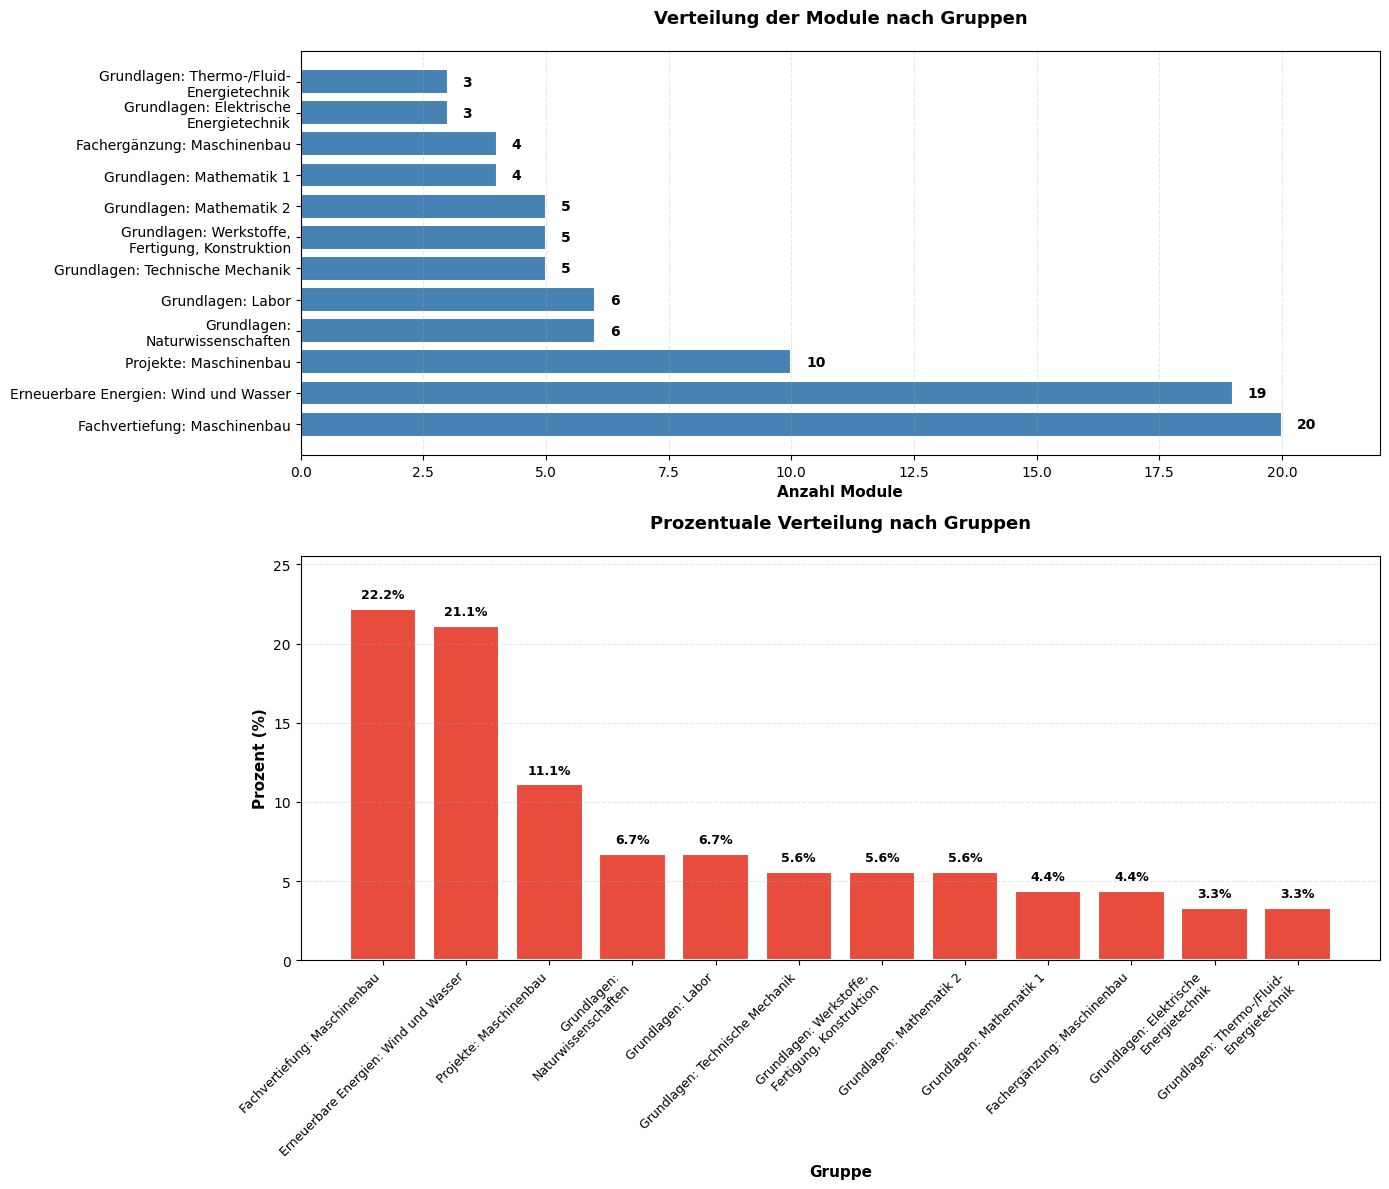

In [19]:
# Verteilung nach Gruppen
print("=" * 60)
print("VERTEILUNG NACH GRUPPEN")
print("=" * 60)
gruppen_verteilung = nodes['Gruppe'].value_counts()
print(gruppen_verteilung)
print(f"\nAnzahl verschiedener Gruppen: {len(gruppen_verteilung)}")
print(f"Module ohne Gruppenangabe: {nodes['Gruppe'].isnull().sum()}")

# Visualisierung
fig, axes = plt.subplots(2, 1, figsize=(14, 12))

# Horizontales Balkendiagramm (oben)
ax = axes[0]
bars_h = ax.barh(range(len(gruppen_verteilung)), gruppen_verteilung.values, 
                 color='steelblue', edgecolor='white', linewidth=1.5)
ax.set_yticks(range(len(gruppen_verteilung)))
ax.set_yticklabels(gruppen_verteilung.index)
ax.set_xlabel('Anzahl Module', fontsize=11, fontweight='bold')
ax.set_title('Verteilung der Module nach Gruppen', fontsize=13, fontweight='bold', pad=20)
ax.grid(True, alpha=0.3, axis='x', linestyle='--')
ax.set_xlim(0, max(gruppen_verteilung.values) * 1.1)
# Werte auf Balken
for i, (bar, val) in enumerate(zip(bars_h, gruppen_verteilung.values)):
    ax.text(bar.get_width() + 0.3, bar.get_y() + bar.get_height()/2, 
            f'{val}', ha='left', va='center', fontsize=10, fontweight='bold')

# Vertikales Balkendiagramm mit Prozentangaben (unten)
ax = axes[1]
gruppen_verteilung_pct = (gruppen_verteilung / gruppen_verteilung.sum() * 100).round(1)
bars_v = ax.bar(range(len(gruppen_verteilung_pct)), gruppen_verteilung_pct.values, 
                color='#e74c3c', edgecolor='white', linewidth=1.5)
ax.set_xlabel('Gruppe', fontsize=11, fontweight='bold')
ax.set_ylabel('Prozent (%)', fontsize=11, fontweight='bold')
ax.set_title('Prozentuale Verteilung nach Gruppen', fontsize=13, fontweight='bold', pad=20)
ax.set_xticks(range(len(gruppen_verteilung_pct)))
ax.set_xticklabels(gruppen_verteilung_pct.index, rotation=45, ha='right', fontsize=9)
ax.grid(True, alpha=0.3, axis='y', linestyle='--')
ax.set_ylim(0, max(gruppen_verteilung_pct.values) * 1.15)
# Prozentangaben auf Balken
for i, (bar, val) in enumerate(zip(bars_v, gruppen_verteilung_pct.values)):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
            f'{val}%', ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()


### Interpretation der Gruppenverteilung

**Hauptgruppen:**
- **Fachvertiefung: Maschinenbau (20 Module, 22.2%)** und **Erneuerbare Energien: Wind und Wasser (19 Module, 21.1%)** dominieren das Curriculum - zusammen fast 43% aller Module
- **Projekte: Maschinenbau (10 Module, 11.1%)** bildet die drittgrößte Gruppe

**Grundlagengruppen:**
- Relativ gleichmäßig verteilt mit 3-6 Modulen pro Gruppe
- **Grundlagen: Naturwissenschaften** und **Grundlagen: Labor** haben je 6 Module (6.7%)
- Technische Mechanik, Werkstoffe/Fertigung/Konstruktion und Mathematik 2 haben je 5 Module (5.6%)

**Fazit:** Das Curriculum ist stark auf Fachvertiefung und erneuerbare Energien fokussiert, mit soliden Grundlagen in verschiedenen Bereichen. Die Projektmodule machen etwa 11% aus, was eine gute Balance zwischen Theorie und Praxis zeigt.


## 3. Verteilung nach Semester


VERTEILUNG NACH SEMESTER
Module mit Semesterangabe: 76
Module ohne Semesterangabe: 16

Statistische Beschreibung:
count    76.000000
mean      6.118421
std       1.773637
min       1.000000
25%       6.000000
50%       6.000000
75%       6.000000
max      14.000000
Name: Semester, dtype: float64

Semester-Verteilung:
Semester
1.0      1
3.0      1
4.0      3
5.0     11
6.0     50
7.0      5
11.0     3
12.0     1
14.0     1
Name: count, dtype: int64


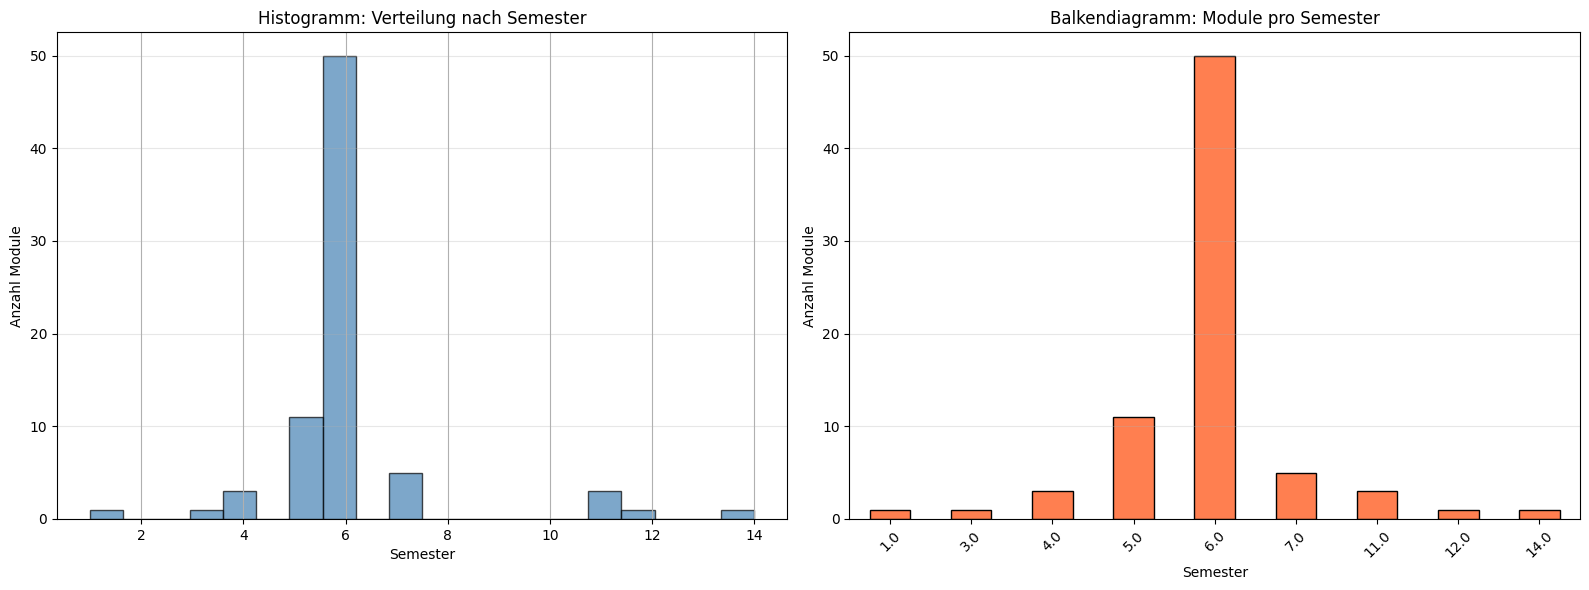

In [13]:
# Semester-Verteilung
print("=" * 60)
print("VERTEILUNG NACH SEMESTER")
print("=" * 60)
semester_clean = nodes['Semester'].dropna()
print(f"Module mit Semesterangabe: {len(semester_clean)}")
print(f"Module ohne Semesterangabe: {nodes['Semester'].isnull().sum()}")

if len(semester_clean) > 0:
    print(f"\nStatistische Beschreibung:")
    print(semester_clean.describe())
    print(f"\nSemester-Verteilung:")
    semester_counts = semester_clean.value_counts().sort_index()
    print(semester_counts)
    
    # Visualisierung
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Histogramm
    ax = axes[0]
    semester_clean.hist(bins=20, ax=ax, edgecolor='black', alpha=0.7, color='steelblue')
    ax.set_xlabel('Semester')
    ax.set_ylabel('Anzahl Module')
    ax.set_title('Histogramm: Verteilung nach Semester')
    ax.grid(True, alpha=0.3, axis='y')
    
    # Balkendiagramm
    ax = axes[1]
    semester_counts.plot(kind='bar', ax=ax, color='coral', edgecolor='black')
    ax.set_xlabel('Semester')
    ax.set_ylabel('Anzahl Module')
    ax.set_title('Balkendiagramm: Module pro Semester')
    ax.grid(True, alpha=0.3, axis='y')
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()
else:
    print("Keine Semesterangaben verfügbar")


### Interpretation der Semester-Verteilung

**Datenverfügbarkeit:**
- 76 von 92 Modulen (82.6%) haben eine Semesterangabe
- 16 Module (17.4%) ohne Semesterangabe - vermutlich flexibel belegbare Module (Projekte, Wahlmodule)

**Verteilung:**
- **Semester 6** dominiert mit den meisten Modulen - typisches Hauptstudium-Semester
- **Semester 5** hat ebenfalls viele Module - Übergang zum Hauptstudium
- **Semester 11-12** haben wenige Module - vermutlich frühe Grundlagenmodule
- **Semester 1, 3-4, 7, 14** haben einzelne Module - spezielle oder optionale Module

**Fazit:** Die Verteilung zeigt eine typische Studienstruktur mit Schwerpunkt im Hauptstudium (Semester 5-6). Die Konzentration auf Semester 6 deutet darauf hin, dass dies das zentrale Studienjahr für die Fachvertiefung ist.


## 4. Semester vs. Gruppen


KREUZTABELLE: SEMESTER vs. GRUPPEN
Semester                                          1.0  3.0  4.0  5.0  6.0  \
Gruppe                                                                      
Erneuerbare Energien: Wind und Wasser               0    0    0    0   18   
Fachergänzung: Maschinenbau                         0    0    0    0    3   
Fachvertiefung: Maschinenbau                        0    0    0    0   18   
Grundlagen:\nNaturwissenschaften                    1    0    0    4    0   
Grundlagen: Elektrische\nEnergietechnik             0    0    0    0    3   
Grundlagen: Labor                                   0    1    0    0    0   
Grundlagen: Mathematik 1                            0    0    3    0    0   
Grundlagen: Mathematik 2                            0    0    0    4    0   
Grundlagen: Technische Mechanik                     0    0    0    0    5   
Grundlagen: Thermo-/Fluid-\nEnergietechnik          0    0    0    0    3   
Grundlagen: Werkstoffe,\nFertigung, Konst

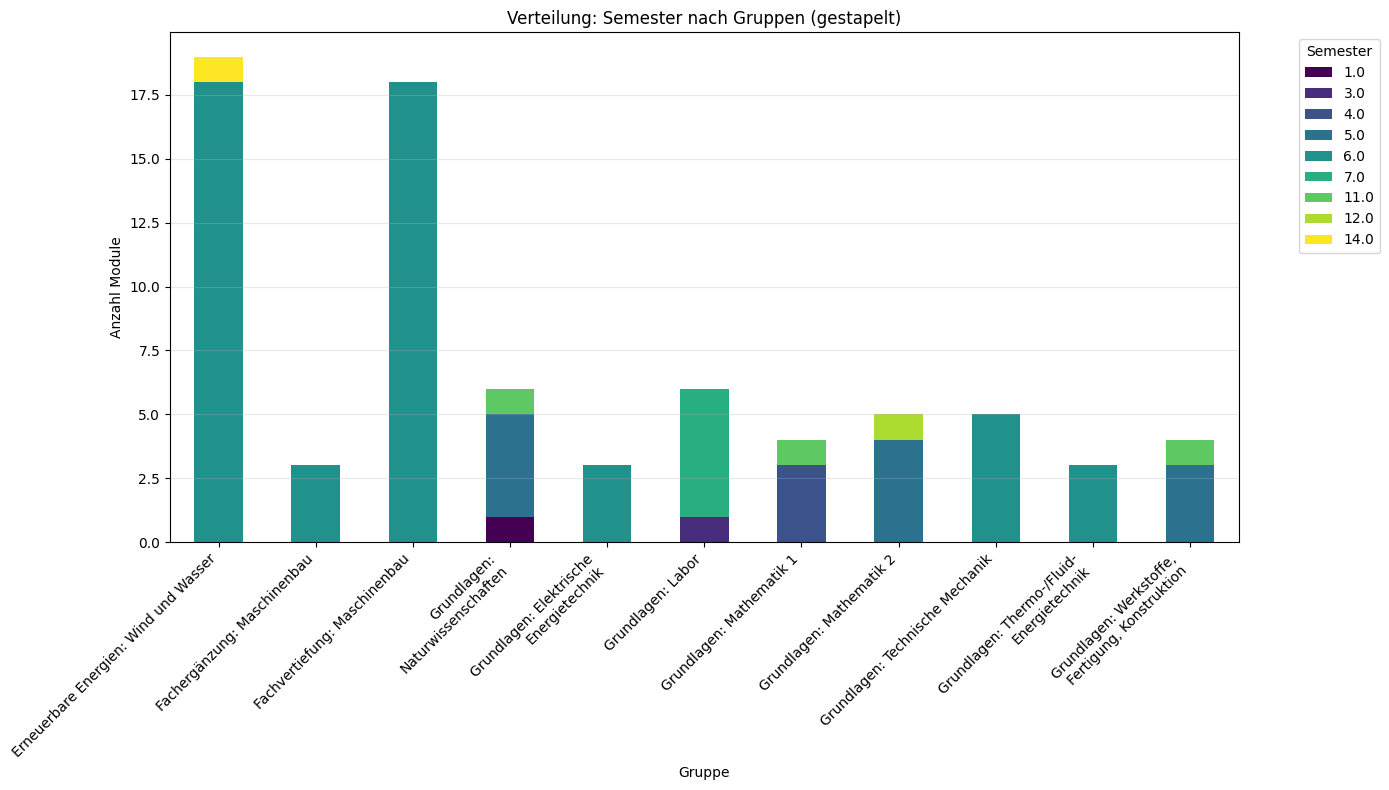

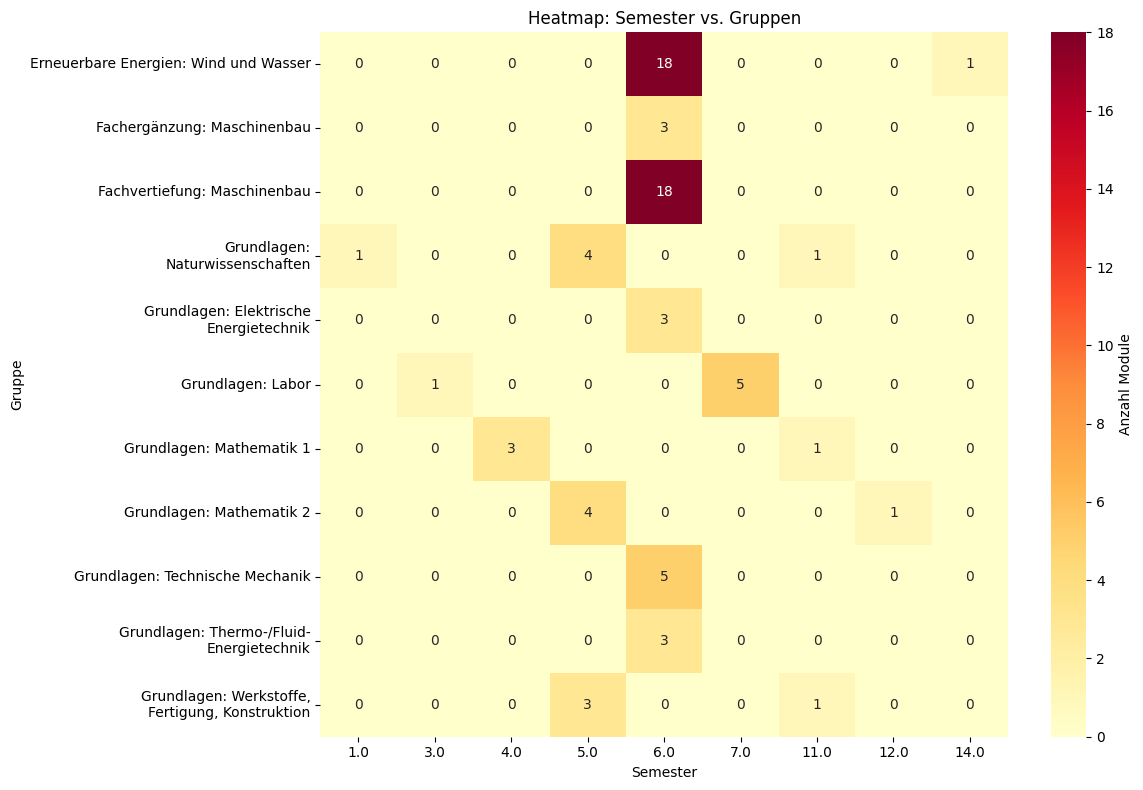

In [14]:
# Kreuztabelle Semester vs. Gruppen
print("=" * 60)
print("KREUZTABELLE: SEMESTER vs. GRUPPEN")
print("=" * 60)

# Erstelle Kreuztabelle
crosstab = pd.crosstab(nodes['Gruppe'], nodes['Semester'], margins=True)
print(crosstab)

# Visualisierung
fig, ax = plt.subplots(figsize=(14, 8))
crosstab_plot = pd.crosstab(nodes['Gruppe'], nodes['Semester'], margins=False)
crosstab_plot.plot(kind='bar', stacked=True, ax=ax, colormap='viridis')
ax.set_xlabel('Gruppe')
ax.set_ylabel('Anzahl Module')
ax.set_title('Verteilung: Semester nach Gruppen (gestapelt)')
ax.legend(title='Semester', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(True, alpha=0.3, axis='y')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Heatmap
fig, ax = plt.subplots(figsize=(12, 8))
crosstab_plot_heat = pd.crosstab(nodes['Gruppe'], nodes['Semester'], margins=False)
sns.heatmap(crosstab_plot_heat, annot=True, fmt='d', cmap='YlOrRd', ax=ax, cbar_kws={'label': 'Anzahl Module'})
ax.set_title('Heatmap: Semester vs. Gruppen')
ax.set_xlabel('Semester')
ax.set_ylabel('Gruppe')
plt.tight_layout()
plt.show()


### Interpretation der Kreuztabelle Semester vs. Gruppen

**Hauptmuster:**
- **Semester 6** ist in fast allen Gruppen stark vertreten - besonders in Fachvertiefung, Erneuerbare Energien und Grundlagen
- **Semester 5** zeigt ebenfalls hohe Aktivität, besonders in Grundlagengruppen
- **Semester 7** konzentriert sich hauptsächlich auf Labor-Module

**Gruppenspezifische Muster:**
- **Grundlagen: Mathematik 1** hat Module in Semester 4 und 11 - frühe und späte Grundlagen
- **Grundlagen: Naturwissenschaften** verteilt über Semester 5, 11 - verschiedene Schwierigkeitsgrade
- **Fachvertiefung** und **Erneuerbare Energien** dominieren Semester 6 - Hauptstudium-Fokus
- **Projekte: Maschinenbau** hat keine Semesterangaben - flexibel belegbar

**Fazit:** Die Heatmap zeigt eine klare Struktur: Grundlagenmodule sind über verschiedene Semester verteilt, während Fachvertiefungsmodule stark auf Semester 6 konzentriert sind. Dies entspricht einer typischen Studienstruktur mit breiter Grundlage und späterer Spezialisierung.
